# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint: expand the squares, and rebuild the quadratic in terms of $\theta$...


$\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right) is proportional to \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right]$ ?

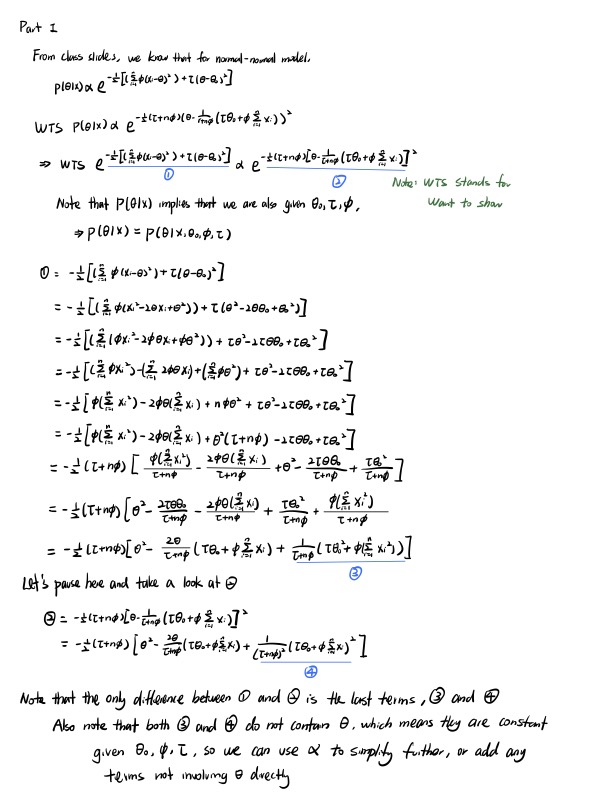
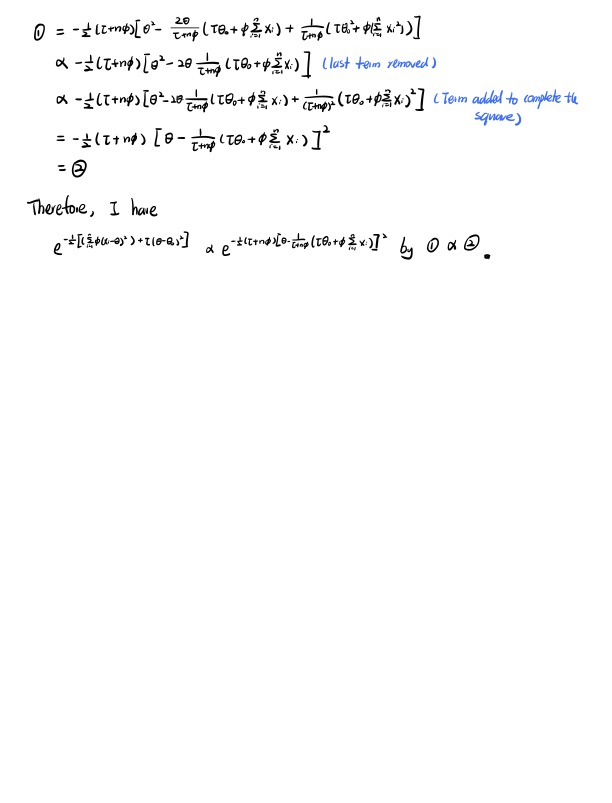

# The "Classic Bayes" Figure [15 minutes]

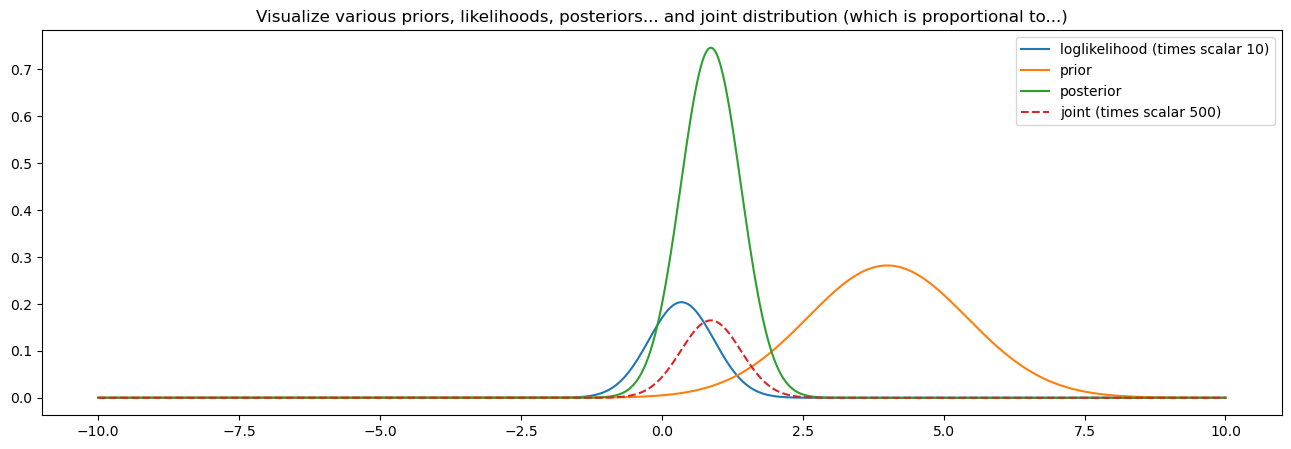

In [11]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)"); 

# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. How do ***log likelihoods*** and ***posteriors*** differ from each other as a result of ***improper priors*** pdiscussed below] and ***marginal likelihood constants***?

<!-- posterior proporitional to joint... --> 


## Solution by Huiyang Chen
## Part 1

0.16792113468807554

0.5235051778839056

0.8173755325991897

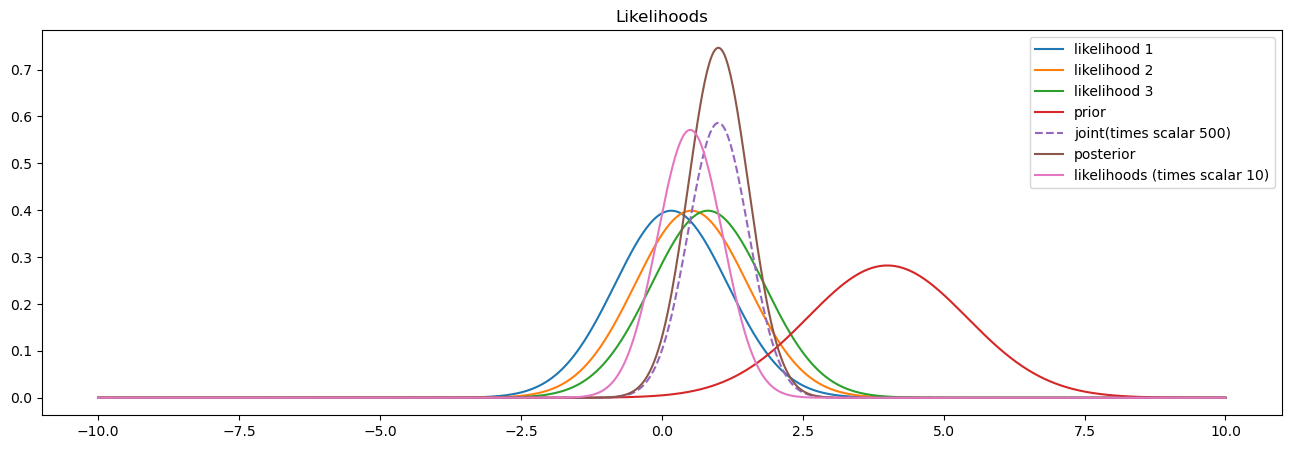

In [8]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Set seed for replication
np.random.seed(365)
# Set up the grid
parameter_domain = np.linspace(-10,10,1001); 
# Specify number of observations
n = 3;
# Draw random numbers from normal(0,1)
x1 = stats.norm(loc=0,scale=1).rvs(1)[0]
x2 = stats.norm(loc=0,scale=1).rvs(1)[0]
x3 = stats.norm(loc=0,scale=1).rvs(1)[0]
# Create likelihood functions
likelihood1 = stats.norm.pdf(x1, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihood2 = stats.norm.pdf(x2, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihood3 = stats.norm.pdf(x3, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihoods = likelihood1*likelihood2*likelihood3
# Create the prior, the same way as the given example
theta_0, tau = 4, 1/2
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Create joint distribution
c,c2 = 500,10; 
joint = c*likelihoods*prior 

# Create posterior distribution
posterior = stats.norm(loc=(tau*theta_0+x1+x2+x3)/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

display(x1, x2, x3)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, likelihood1, label="likelihood 1")
plt.plot(parameter_domain, likelihood2, label="likelihood 2")
plt.plot(parameter_domain, likelihood3, label="likelihood 3")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint(times scalar 500)")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, c2*likelihoods, label="likelihoods (times scalar 10)")
plt.legend(); 
plt.title("Likelihoods");

## Part 2

0.16792113468807554

0.5235051778839056

0.8173755325991897

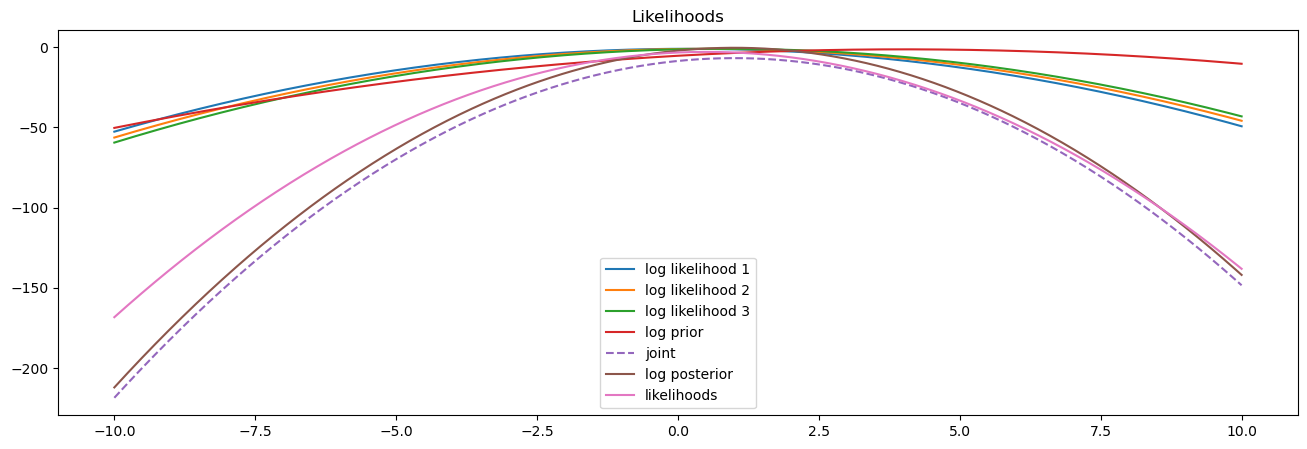

In [9]:
# Set seed for replication
np.random.seed(365)
# Set up the grid
parameter_domain = np.linspace(-10,10,1001); 
# Specify number of observations
n = 3;
# Draw random numbers from normal(0,1)
x1 = stats.norm(loc=0,scale=1).rvs(1)[0]
x2 = stats.norm(loc=0,scale=1).rvs(1)[0]
x3 = stats.norm(loc=0,scale=1).rvs(1)[0]
# Create likelihood functions
likelihood1 = stats.norm.logpdf(x1, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihood2 = stats.norm.logpdf(x2, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihood3 = stats.norm.logpdf(x3, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihoods = likelihood1+likelihood2+likelihood3
# Create the prior, the same way as the given example
theta_0, tau = 4, 1/2
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)

# Create joint distribution
joint = likelihoods+prior 

# Create posterior distribution
posterior = stats.norm(loc=(tau*theta_0+x1+x2+x3)/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

display(x1, x2, x3)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, likelihood1, label="log likelihood 1")
plt.plot(parameter_domain, likelihood2, label="log likelihood 2")
plt.plot(parameter_domain, likelihood3, label="log likelihood 3")
plt.plot(parameter_domain, prior, label="log prior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint")
plt.plot(parameter_domain, posterior, label="log posterior")
plt.plot(parameter_domain, likelihoods, label="likelihoods")
plt.legend(); 
plt.title("Likelihoods");

## Part 3
Now we are given $p(\theta) \propto 1$, indicating that our prior is no longer a conjugate prior by a flat prior. Let's try compute the visualize the classic Bayes figure with a flat prior Uniform(-10, 10).

In this case, the posterior is:
$P(\theta | x) = \frac{P(x|\theta) P(\theta)}{p(x)}$


$P(\theta | x) \propto \prod_{i=1}^n\sqrt{\frac{\phi}{2\pi}} e^{-\frac{\phi\left(x_i-\theta\right)^2}{2}} * \frac{1}{20}$

So, we can say that $P(\theta | x) \propto P(x|\theta)$, the likelihood.

0.16792113468807554

0.5235051778839056

0.8173755325991897

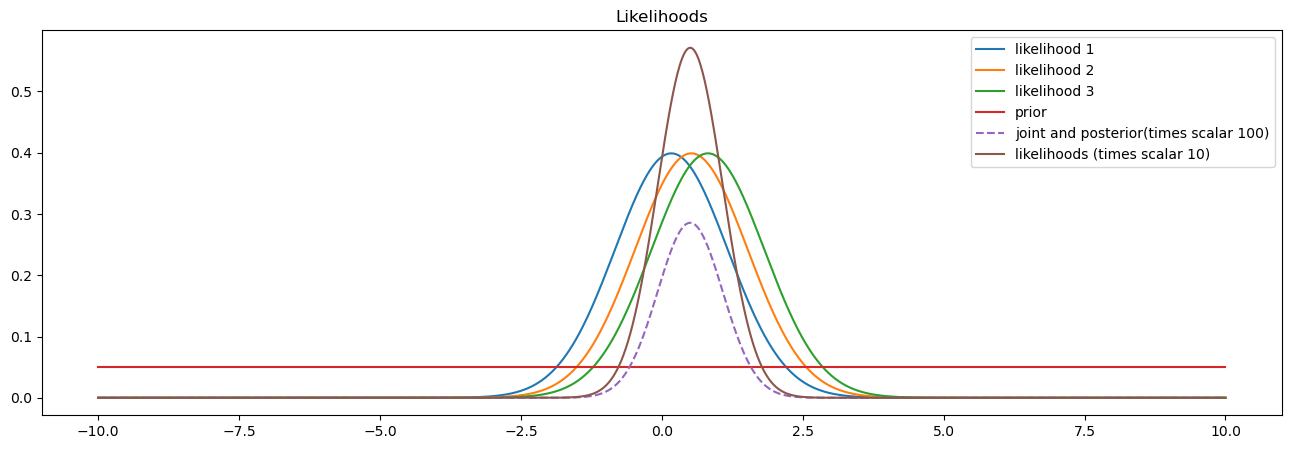

In [10]:
# Set seed for replication
np.random.seed(365)
# Set up the grid
parameter_domain = np.linspace(-10,10,1001); 
# Specify number of observations
n = 3;
# Draw random numbers from normal(0,1)
x1 = stats.norm(loc=0,scale=1).rvs(1)[0]
x2 = stats.norm(loc=0,scale=1).rvs(1)[0]
x3 = stats.norm(loc=0,scale=1).rvs(1)[0]
# Create likelihood functions
likelihood1 = stats.norm.pdf(x1, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihood2 = stats.norm.pdf(x2, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihood3 = stats.norm.pdf(x3, 
                            loc=parameter_domain, scale=1) # sigma=1 known
likelihoods = likelihood1*likelihood2*likelihood3
# Create the prior, the same way as the given example
theta_0, tau = 4, 1/2
prior = stats.uniform(loc=-10, scale=20).pdf(parameter_domain)

# Create joint distribution
c,c2 = 100,10; 
joint = c*likelihoods*prior 

# Create posterior distribution
posterior = joint

display(x1, x2, x3)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, likelihood1, label="likelihood 1")
plt.plot(parameter_domain, likelihood2, label="likelihood 2")
plt.plot(parameter_domain, likelihood3, label="likelihood 3")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint and posterior(times scalar 100)")
plt.plot(parameter_domain, c2*likelihoods, label="likelihoods (times scalar 10)")
plt.legend(); 
plt.title("Likelihoods");

## Part 4